자동으로 투영변환을 구현해보자.

In [1]:
import numpy as np
import cv2
import cv2_plus

이미지 불러오기

In [2]:
img = cv2.imread('images/transform.jpg')   

밑의 값들은 찾았다고 가정한다

In [3]:
topLeft = [127, 157]
topRight = [448, 152]
bottomRight = [579, 526]
bottomLeft = [54, 549]   

pts1 = np.float32([topLeft, topRight, bottomRight, bottomLeft])

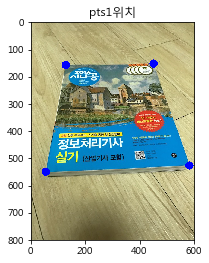

In [4]:
for i in range(len(pts1)):
    cv2.circle(img, tuple(pts1[i]), 15, (255,0,0),-1)
cv2_plus.imshow(img, 'pts1위치')

In [5]:
w1 = abs(bottomRight[0] - bottomLeft[0])
w2 = abs(topRight[0] - topLeft[0])
h1 = abs(topRight[1] - bottomRight[1])
h2 = abs(topLeft[1] - bottomLeft[1])

minWidth와 minHeight는 가로1, 가로2, 세로1, 세로2에서 가로와 세로별로 최소값을 뽑는 것이다.

In [6]:
minWidth = min([w1, w2])
minHeight = min([h1, h2])

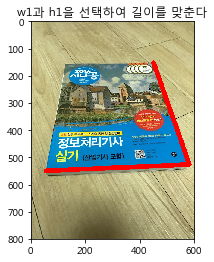

In [7]:
img = cv2.imread('images/transform.jpg')   


cv2.line(img, tuple(pts1[2]), tuple(pts1[3]), (0,0,255),15)# w1
cv2.line(img, tuple(pts1[1]), tuple(pts1[2]), (0,0,255),15)# h1


cv2_plus.imshow(img, 'w1과 h1을 선택하여 길이를 맞춘다')

변환 이동될 좌표, -1은 extra 픽셀을 삭제

In [8]:
pts2 = np.float32([[0,0], [minWidth-1,0], 
                  [minWidth-1,minHeight-1], [0,minHeight-1]])

In [9]:
pts2

array([[   0.,    0.],
       [ 320.,    0.],
       [ 320.,  373.],
       [   0.,  373.]], dtype=float32)

cv2.getPerspectiveTransform()을 사용하여 affine과는 다르게 원근보정을 줄 수 있는 변환 매트릭스를 반환.<p>
**또한 getAffineTransform()은 3 Point가 필요하지만 getPerspectiveTransform()은 4개의 Point가 필요하다.**

In [10]:
M = cv2.getPerspectiveTransform(pts1, pts2)

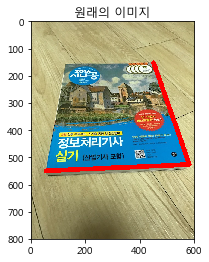

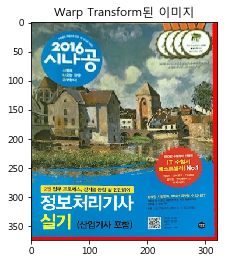

In [11]:
result = cv2.warpPerspective(img, M, (int(minWidth), int(minHeight)))

cv2_plus.imshow(img, '원래의 이미지')
cv2_plus.imshow( result,'Warp Transform된 이미지')